# Setup

In [1]:
import pandas as pd
import numpy as np
import INS_Denoiser as insd

In [2]:
import seaborn as sns

In [3]:
trials = '../../Simulations/varied_detector_positions/trials.csv'
trials = pd.read_csv(trials, index_col=0)
trials

,name,x_pos,z_pos,distance_from_shielding,distance_from_ground,filename,ptrac_filename
index,,,,,,,
0,detector_x_40_z_-7,40.0,-7.000000,0.0,30.000000,output/mctal/detector_x_40_z_-7.mctal,output/ptrac/detector_x_40_z_-7.ptrac
1,detector_x_40_z_-3,40.0,-3.666667,0.0,33.333333,output/mctal/detector_x_40_z_-3.mctal,output/ptrac/detector_x_40_z_-3.ptrac
2,detector_x_40_z_0,40.0,-0.333333,0.0,36.666667,output/mctal/detector_x_40_z_0.mctal,output/ptrac/detector_x_40_z_0.ptrac
3,detector_x_40_z_3,40.0,3.000000,0.0,40.000000,output/mctal/detector_x_40_z_3.mctal,output/ptrac/detector_x_40_z_3.ptrac
4,detector_x_40_z_6,40.0,6.333333,0.0,43.333333,output/mctal/detector_x_40_z_6.mctal,output/ptrac/detector_x_40_z_6.ptrac
...,...,...,...,...,...,...,...
85,detector_x_70_z_0,70.0,-0.333333,30.0,36.666667,output/mctal/detector_x_70_z_0.mctal,output/ptrac/detector_x_70_z_0.ptrac
86,detector_x_70_z_3,70.0,3.000000,30.0,40.000000,output/mctal/detector_x_70_z_3.mctal,output/ptrac/detector_x_70_z_3.ptrac
87,detector_x_80_z_-17,80.0,-17.000000,40.0,20.000000,output/mctal/detector_x_80_z_-17.mctal,output/ptrac/detector_x_80_z_-17.ptrac


In [5]:
spectrograms = '../../Simulations/varied_detector_positions/spectrograms.npz'
spectrograms = np.load(spectrograms)
bins = spectrograms['x']
spectrograms = spectrograms['y']

spectrums = '../../Simulations/varied_detector_positions/spectrums.npz'
spectrums = np.load(spectrums)
spectrums = spectrums['y']

gebless_spectrums = '../../Simulations/varied_detector_positions/gebless_spectrums.npz'
gebless_spectrums = np.load(gebless_spectrums)
gebless_spectrums = gebless_spectrums['y']

In [6]:
import matplotlib.pyplot as plt

In [33]:
elements = {
    'f': {
        'title': None,
        'xlim': None,
    }, 
    'c': {
        'title': 'Carbon',
        'xlim': (3.5, 5.5),
        'ylim': (5e1, 5e2)
    },
    'si': {
        'title': 'Silicon',
        'xlim': (1.4, 2.2),
        'ylim': (2e2, 1e3)
    }
}

# location ax

In [281]:
def detector_positions(ax, index=None, z=None):
    # ax.scatter(trials['distance_from_shielding'], trials['distance_from_ground'])
    ax.scatter(trials['distance_from_shielding'], trials['distance_from_ground'], s=5, marker='v')
    hue_norm = (None, None)
    if z:
        hue_norm = (trials[z].mean(), trials[z].max())
    sns.scatterplot(x='distance_from_shielding', y='distance_from_ground', data=trials, ax=ax, hue=z, hue_norm=hue_norm)
    
    # put z next to their points
    if z:
        for i in range(trials.shape[0]):
            val = trials.loc[i][z]
            if val>0:
                ax.text(trials.loc[i]['distance_from_shielding'], trials.loc[i]['distance_from_ground'], int(trials.loc[i][z]), fontsize=7)
            # ax.text(trials.loc[i]['distance_from_shielding'], trials.loc[i]['distance_from_ground'], str(trials.loc[i][z])[:2])
    if z:
        pass
    ax.set_xlabel('Distance from Shielding (cm)')
    ax.set_ylabel('Distance from Ground (cm)')
    # ax.set_title('Detector Positions')
    if index:
        ax.scatter(trials.loc[index]['distance_from_shielding'], trials.loc[index]['distance_from_ground'], s=50, marker='x', color='blue')
    ax.legend().remove()

# spectrum ax

In [318]:
result['si'].keys()

dict_keys(['signal_integral', 'bins', 'total_fit', 'baseline_fit', 'signal_fit'])

In [319]:
def plot_single_spectrum(ax, spectrums, results=None, element=None, index=0, t=0):
    ax.plot(bins, spectrums[index][t])
    if results:
        result = results[index]
        if result:
            if element:
                ax.plot(result[element]['bins'], result[element]['total_fit'])
                ax.plot(result[element]['bins'], result[element]['baseline_fit'])
    else:
        pass
    ax.set_yscale('log')
    ax.set_xlabel('Energy (keV)')
    # ax.set_ylabel('Counts')

    if element:
        # ax.set_title(element)
        ax.set_xlim(elements[element]['xlim'])
        ax.set_ylim(elements[element]['ylim'])

# Graphic 1

In [214]:
def g1(index):
    spectrum = spectrums[index]
    fig, axes = plt.subplot_mosaic("ABB;CCC", figsize=(10, 8))

    detector_positions(axes['A'], index=index)
    plot_single_spectrum(axes['B'], spectrums, index=index, t=0)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_187524/622176576.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='distance_from_shielding', y='distance_from_ground', data=trials, ax=ax, hue=z, hue_norm=hue_norm, palette='rocket', legend='brief')
/tmp/ipykernel_187524/622176576.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


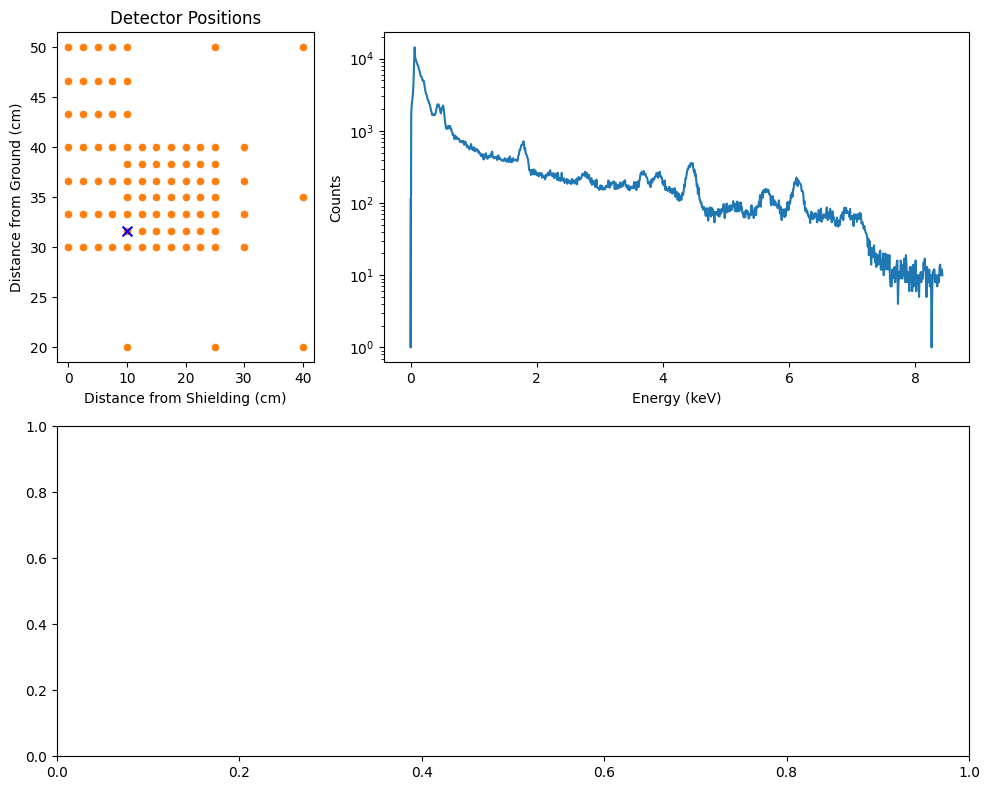

In [237]:
g1(
    30#-7
    )

# Using the package


In [231]:
results = []
for index in range(len(spectrums)):
    try:
        result = insd.proc.proc(
            x_wave=bins, 
            y_wave=spectrums[index][0], 
            return_fits=True,
            si_window=(1.5, 2.2),
            c_window=(4.2, 4.8),
            version='Cortes_exp_falloff'
            )
        results.append(result)
    except:
        print(f'Failed to process index {index}')
        results.append(None)

trials['results'] = results
# if result is None then mark as outlier
trials['outlier'] = trials['results'].apply(lambda x: x is None)

Failed to process index 0
Failed to process index 1
Failed to process index 2
Failed to process index 3
Failed to process index 4
Failed to process index 5
Failed to process index 6
Failed to process index 7
Failed to process index 8
Failed to process index 9
Failed to process index 10
Failed to process index 11
Failed to process index 12
Failed to process index 13
Failed to process index 14
Failed to process index 15
Failed to process index 16
Failed to process index 17
Failed to process index 18
Failed to process index 19
Failed to process index 20


In [232]:
# [trials['results'][i]['si']['signal_integral'] for i in range(len(trials))]

# put signal integrals into dataframe
trials['si_signal_integral'] = trials['results'].apply(lambda x: x['si']['signal_integral'] if x else None)
trials['c_signal_integral'] = trials['results'].apply(lambda x: x['c']['signal_integral'] if x else None)

# hist ax

In [ ]:
def histogram(ax, trials, column, index=None, bins=100):
    sns.histplot(trials[column], bins=bins, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('')
    if index:
        ax.axvline(trials.loc[index][column], color='red')

# g2

In [275]:
def g2(index):
    fig, axes = plt.subplot_mosaic("AGB;CHD;EHF", figsize=(4*3.5, 3*3.5))
    
    detector_positions(axes['A'], index=index, z='si_signal_integral')
    detector_positions(axes['B'], index=index, z='c_signal_integral')
    plot_single_spectrum(axes['C'], spectrums, results=results, element='si', index=index, t=0)
    plot_single_spectrum(axes['D'], spectrums, results=results, element='c', index=index, t=0)
    histogram(axes['E'], trials, 'si_signal_integral', index=index)
    histogram(axes['F'], trials, 'c_signal_integral', index=index)
    # plt.tight_layout()
    plot_single_spectrum(axes['G'], spectrums, results=results, index=index, t=0)
    axes['G'].set_title(f'Index: {index}')
    axes['A'].set_title('Silicone Peak Area')
    axes['B'].set_title('Carbon Peak Area')
    plt.show()

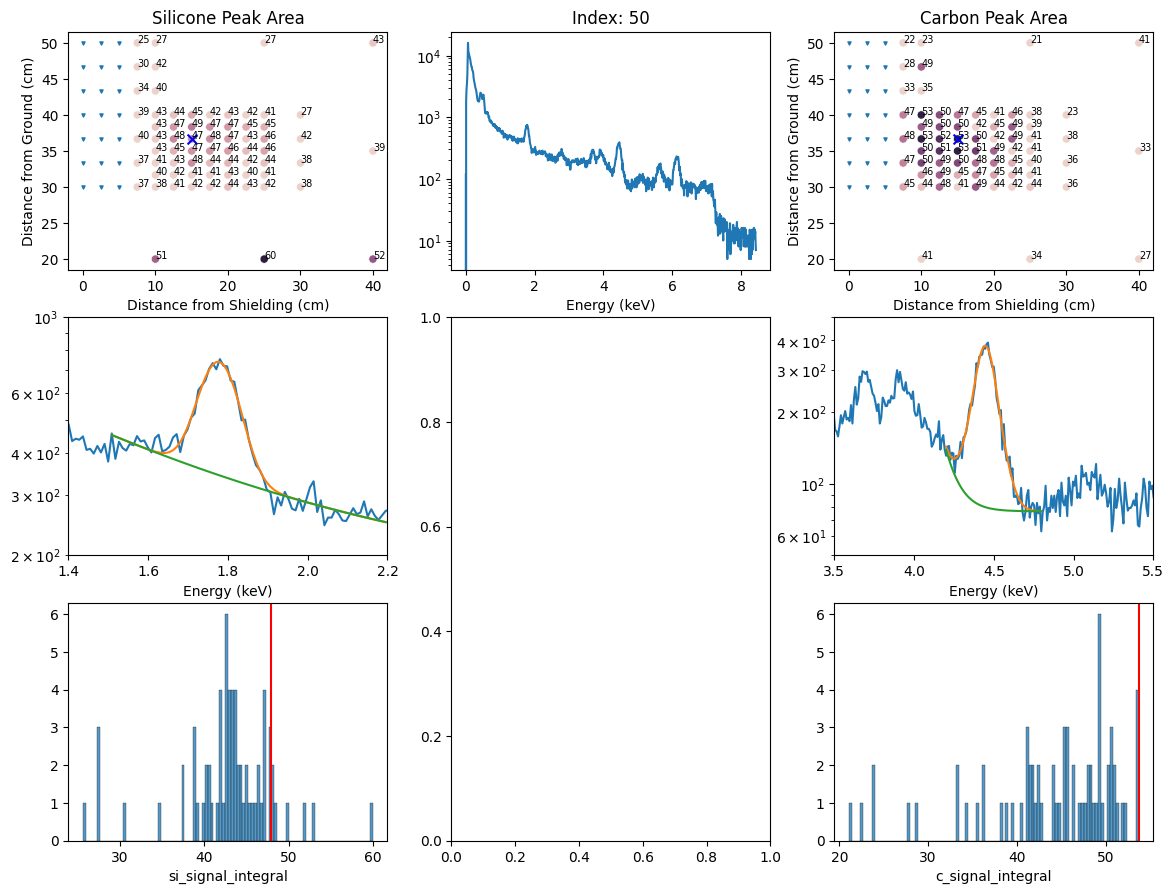

In [320]:
g2(50)

# g3

In [300]:
trials.reset_index(drop=False, inplace=True)

In [301]:
trials

,index,name,x_pos,z_pos,distance_from_shielding,distance_from_ground,filename,ptrac_filename,results,outlier,si_signal_integral,c_signal_integral
0,0,detector_x_40_z_-7,40.0,-7.000000,0.0,30.000000,output/mctal/detector_x_40_z_-7.mctal,output/ptrac/detector_x_40_z_-7.ptrac,None,True,NaN,NaN
1,1,detector_x_40_z_-3,40.0,-3.666667,0.0,33.333333,output/mctal/detector_x_40_z_-3.mctal,output/ptrac/detector_x_40_z_-3.ptrac,None,True,NaN,NaN
2,2,detector_x_40_z_0,40.0,-0.333333,0.0,36.666667,output/mctal/detector_x_40_z_0.mctal,output/ptrac/detector_x_40_z_0.ptrac,None,True,NaN,NaN
3,3,detector_x_40_z_3,40.0,3.000000,0.0,40.000000,output/mctal/detector_x_40_z_3.mctal,output/ptrac/detector_x_40_z_3.ptrac,None,True,NaN,NaN
4,4,detector_x_40_z_6,40.0,6.333333,0.0,43.333333,output/mctal/detector_x_40_z_6.mctal,output/ptrac/detector_x_40_z_6.ptrac,None,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,detector_x_70_z_0,70.0,-0.333333,30.0,36.666667,output/mctal/detector_x_70_z_0.mctal,output/ptrac/detector_x_70_z_0.ptrac,"{'si': {'signal_integral': 42.688560024066035,...",False,42.688560,38.816376
86,86,detector_x_70_z_3,70.0,3.000000,30.0,40.000000,output/mctal/detector_x_70_z_3.mctal,output/ptrac/detector_x_70_z_3.ptrac,"{'si': {'signal_integral': 27.707825469457358,...",False,27.707825,23.875788
87,87,detector_x_80_z_-17,80.0,-17.000000,40.0,20.000000,output/mctal/detector_x_80_z_-17.mctal,output/ptrac/detector_x_80_z_-17.ptrac,"{'si': {'signal_integral': 52.91150601462546, ...",False,52.911506,27.884639
88,88,detector_x_80_z_-2,80.0,-2.000000,40.0,35.000000,output/mctal/detector_x_80_z_-2.mctal,output/ptrac/detector_x_80_z_-2.ptrac,"{'si': {'signal_integral': 39.825970377187936,...",False,39.825970,33.390036


In [312]:
def g3():
    fig, axes = plt.subplot_mosaic("ABC;DEF", figsize=(4*3.5, 3*3.5))
    axes['B'].set_title('Silicone Peak Area')
    axes['C'].set_title('Carbon Peak Area')
    detector_positions(axes['B'], z='si_signal_integral')
    detector_positions(axes['C'], z='c_signal_integral')
    histogram(axes['E'], trials, 'si_signal_integral')
    histogram(axes['F'], trials, 'c_signal_integral')
    detector_positions(axes['A'], z='index')
    axes['A'].set_title('Trial Index')
    axes['D'].axis('off')
    plt.show()

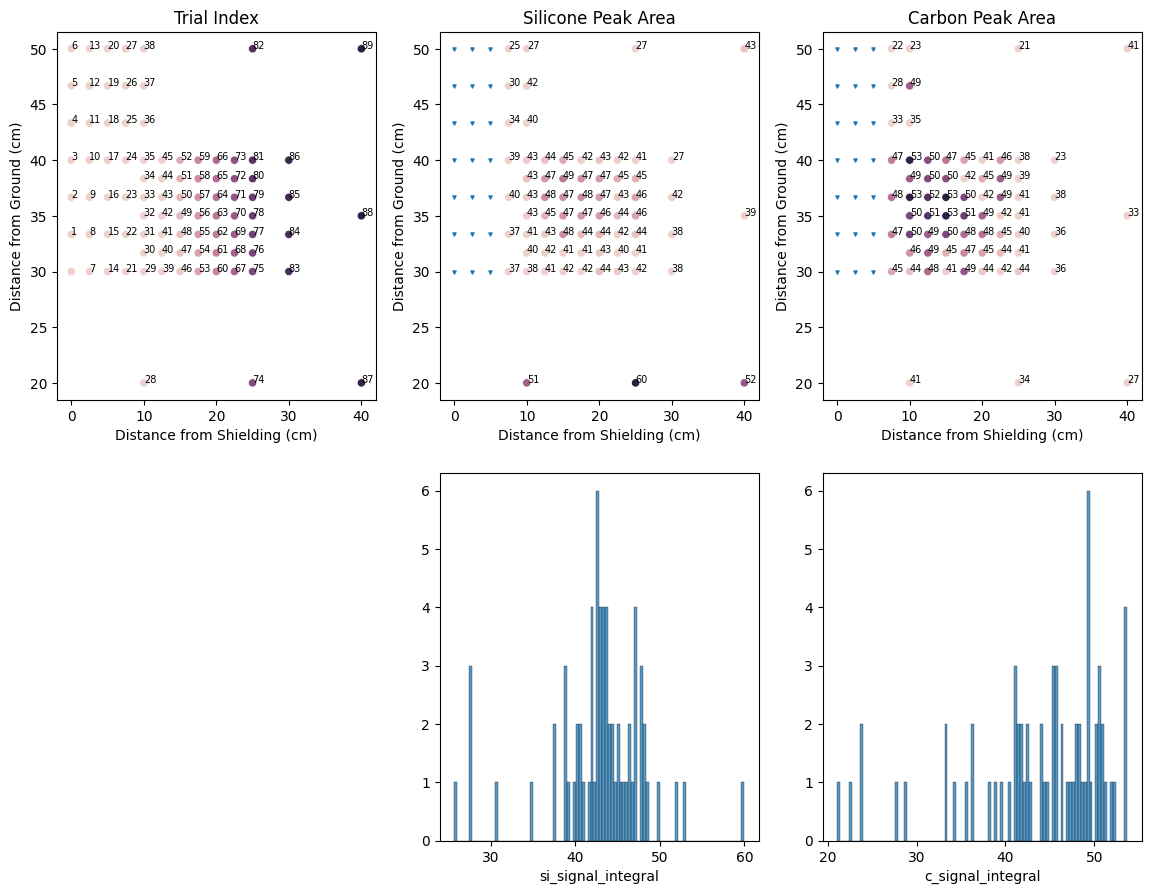

In [313]:
g3()

In [270]:
trials

,name,x_pos,z_pos,distance_from_shielding,distance_from_ground,filename,ptrac_filename,results,outlier,si_signal_integral,c_signal_integral
index,,,,,,,,,,,
0,detector_x_40_z_-7,40.0,-7.000000,0.0,30.000000,output/mctal/detector_x_40_z_-7.mctal,output/ptrac/detector_x_40_z_-7.ptrac,None,True,NaN,NaN
1,detector_x_40_z_-3,40.0,-3.666667,0.0,33.333333,output/mctal/detector_x_40_z_-3.mctal,output/ptrac/detector_x_40_z_-3.ptrac,None,True,NaN,NaN
2,detector_x_40_z_0,40.0,-0.333333,0.0,36.666667,output/mctal/detector_x_40_z_0.mctal,output/ptrac/detector_x_40_z_0.ptrac,None,True,NaN,NaN
3,detector_x_40_z_3,40.0,3.000000,0.0,40.000000,output/mctal/detector_x_40_z_3.mctal,output/ptrac/detector_x_40_z_3.ptrac,None,True,NaN,NaN
4,detector_x_40_z_6,40.0,6.333333,0.0,43.333333,output/mctal/detector_x_40_z_6.mctal,output/ptrac/detector_x_40_z_6.ptrac,None,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
85,detector_x_70_z_0,70.0,-0.333333,30.0,36.666667,output/mctal/detector_x_70_z_0.mctal,output/ptrac/detector_x_70_z_0.ptrac,"{'si': {'signal_integral': 42.688560024066035,...",False,42.688560,38.816376
86,detector_x_70_z_3,70.0,3.000000,30.0,40.000000,output/mctal/detector_x_70_z_3.mctal,output/ptrac/detector_x_70_z_3.ptrac,"{'si': {'signal_integral': 27.707825469457358,...",False,27.707825,23.875788
87,detector_x_80_z_-17,80.0,-17.000000,40.0,20.000000,output/mctal/detector_x_80_z_-17.mctal,output/ptrac/detector_x_80_z_-17.ptrac,"{'si': {'signal_integral': 52.91150601462546, ...",False,52.911506,27.884639
